# Feature Engineering :- 
Feature engineering is a process of using domain knowlege to extract a features from row data. these features can be use to inprove the proformance of machine algorithms

There ar four type of feature engineering :-
1. Feature transformation
2. feature construction 
3. feature scaling 
4. feature extraction

Feature scaling :-
1. satandardization
2. Normalization
                        

# 1.Standardization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv(r'C:\Users\AmiteshOP\Downloads\Social_Network_Ads.csv')

In [24]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [26]:
df=df.iloc[:,2:]

In [27]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [28]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [31]:
np.round(df.describe(),1)

,Age,EstimatedSalary,Purchased
count,400.0,400.0,400.0
mean,37.7,69742.5,0.4
std,10.5,34097.0,0.5
min,18.0,15000.0,0.0
25%,29.8,43000.0,0.0
50%,37.0,70000.0,0.0
75%,46.0,88000.0,1.0
max,60.0,150000.0,1.0


# train test split

In [35]:
X = df.drop('Purchased',axis=1)
y = df['Purchased']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,
                                                random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [39]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [40]:
X_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
216,49,65000
259,45,131000
49,31,89000
238,46,82000


In [42]:
# satndardScale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [44]:
scale.fit(X_train)

# transform train or test set
X_train_scaled=scale.transform(X_train)
y_test_scaled=scale.transform(X_test)

In [45]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [46]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [50]:
# converting np array to dataframe
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_train.columns)

In [51]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [52]:
np.round(X_test_scaled.describe(),1)

,Age,EstimatedSalary
count,120.0,120.0
mean,-0.1,-0.0
std,1.1,1.0
min,-1.9,-1.6
25%,-1.0,-0.7
50%,-0.2,-0.2
75%,0.7,0.5
max,2.2,2.3


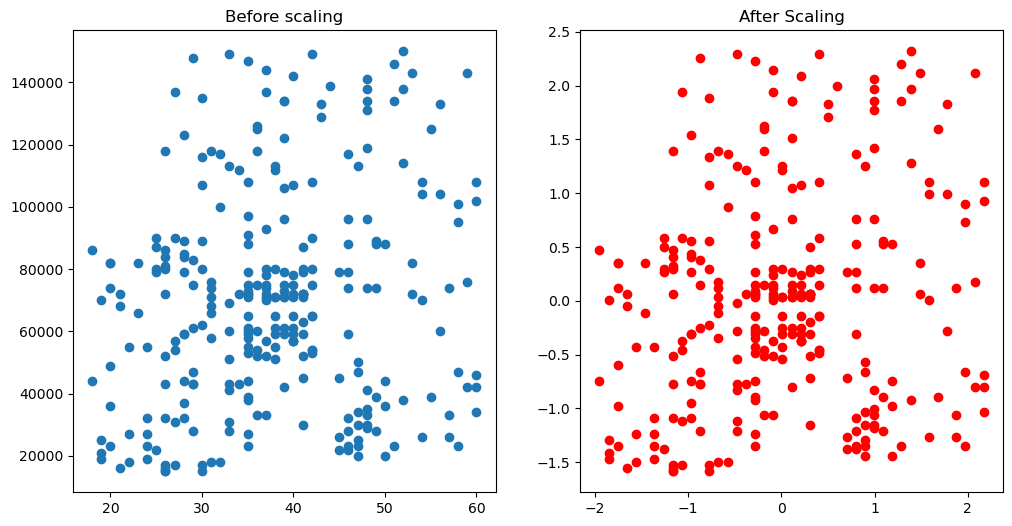

In [56]:
fig, (ax1,ax2) =plt.subplots(ncols=2,figsize=(12,6))

ax1.set_title('Before scaling')
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])

ax2.set_title('After Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red');

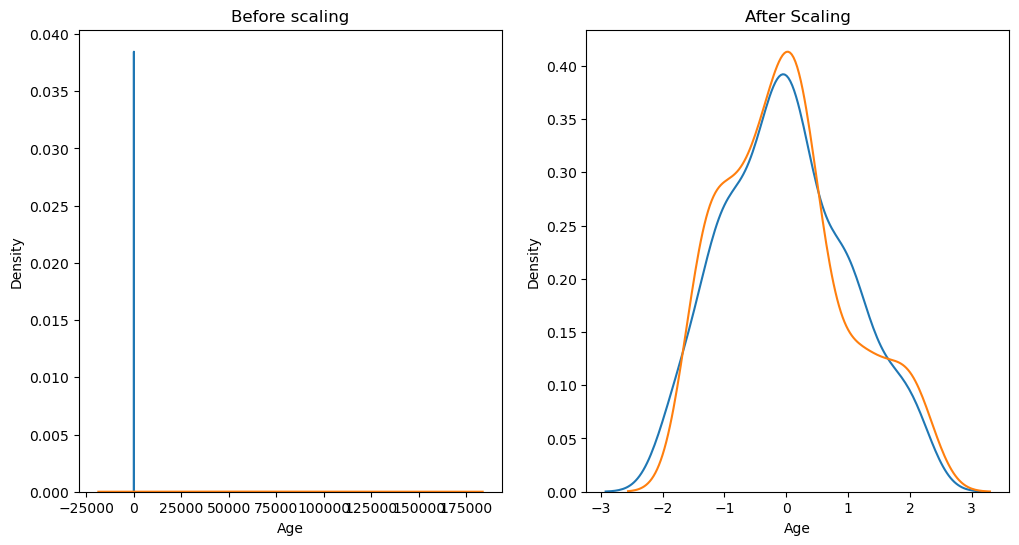

In [59]:
fig, (ax1,ax2) =plt.subplots(ncols=2,figsize=(12,6))

ax1.set_title('Before scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2);

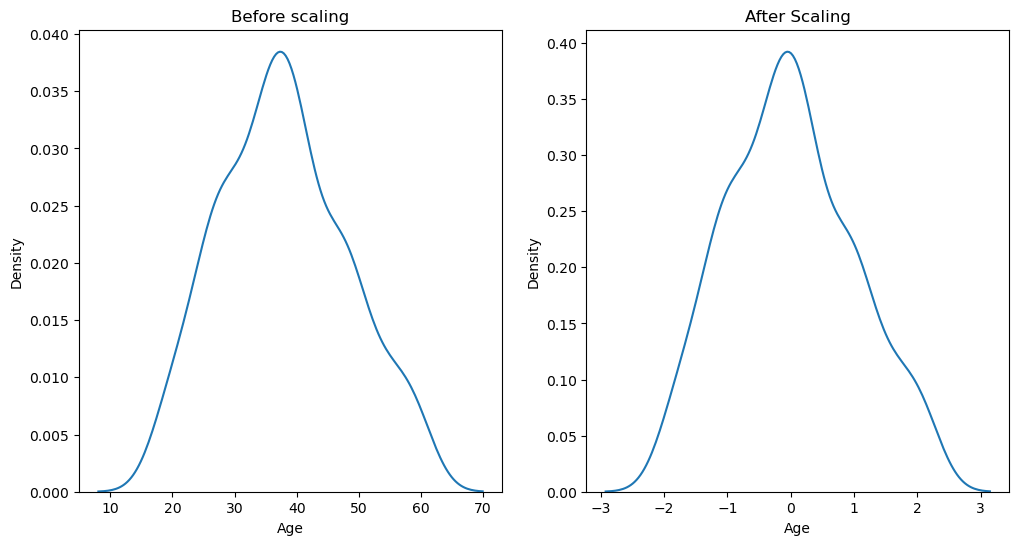

In [60]:
fig, (ax1,ax2) =plt.subplots(ncols=2,figsize=(12,6))

ax1.set_title('Before scaling')
sns.kdeplot(X_train['Age'],ax=ax1)


ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2);


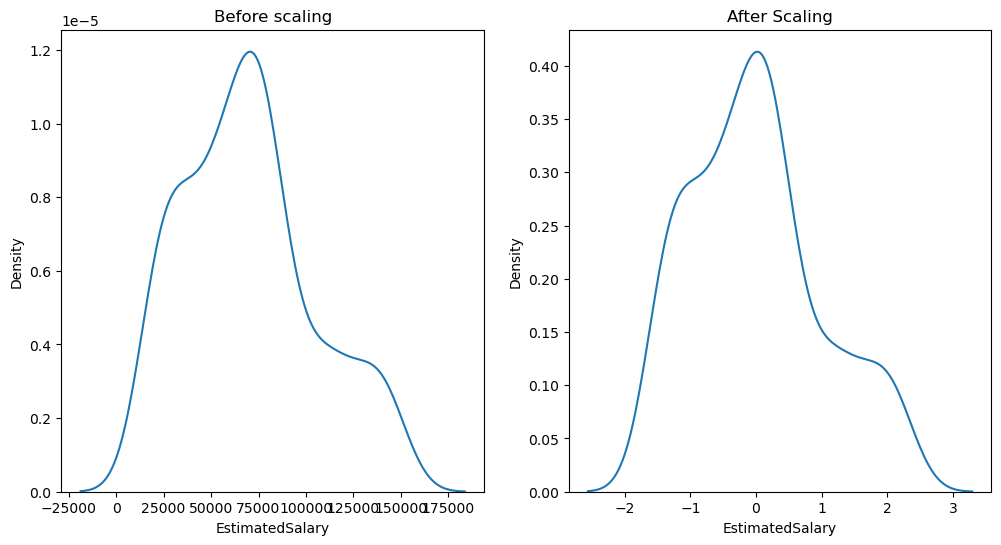

In [61]:
fig, (ax1,ax2) =plt.subplots(ncols=2,figsize=(12,6))

ax1.set_title('Before scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)


ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2);

In [81]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg_scaled=LogisticRegression()

In [82]:
lg.fit(X_train,y_train)
lg_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [83]:
y_pred= lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [84]:
from sklearn.metrics import accuracy_score
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [85]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [86]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [87]:
y_pred= dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [88]:
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875
